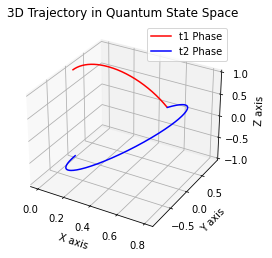

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def compute_xyz(delta, epsilon, x0, y0, z0, t, t_switch):
    Omega = np.sqrt(1 + delta**2)

    x_t, y_t, z_t = [], [], []

    for ti in t:
        if ti >= t_switch:
            epsilon_eff = -epsilon
            sign_flip = -1
        else:
            epsilon_eff = epsilon
            sign_flip = 1

        A = y0
        B = (delta * x0 - epsilon_eff * z0) / Omega

        x = sign_flip * (x0 - (delta * B / Omega) - (delta / Omega) * (A * np.sin(Omega * ti) - B * np.cos(Omega * ti)))
        y = sign_flip * (A * np.cos(Omega * ti) + B * np.sin(Omega * ti))
        z = sign_flip * (z0 + (epsilon_eff * B / Omega) + (epsilon_eff / Omega) * (A * np.sin(Omega * ti) - B * np.cos(Omega * ti)))

        x_t.append(x)
        y_t.append(y)
        z_t.append(z)

    return np.array(x_t), np.array(y_t), np.array(z_t)

# Set parameters
delta = -0.5
epsilon = -1
x0, y0, z0 = 0, 0, 1

# Control times
t1 = (np.pi - np.arccos(delta**2)) / np.sqrt(1 + delta**2)
t2 = (np.pi + np.arccos(delta**2)) / np.sqrt(1 + delta**2)
t_switch = t1

t_total = t1 + t2

# t1arr = np.linspace(0, t1, 500)
# t2arr = np.linspace(t1arr[499], t_total, 500)
# t2arr = t2arr[1:]
# t = np.concatenate((t1arr, t2arr))

t = np.linspace(0,t_total, 500)

# Compute trajectories
x, y, z = compute_xyz(delta, epsilon, x0, y0, z0, t, t_switch)

# Save data to a CSV file
data = pd.DataFrame({'Time': t, 'X': x, 'Y': y, 'Z': z})
data.to_csv('quantum_system_trajectory.csv', index=False)

# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
split_index = np.argmin(np.abs(t - t1))
ax.plot(x[:split_index], y[:split_index], z[:split_index], color='red', label='t1 Phase')
ax.plot(x[split_index:], y[split_index:], z[split_index:], color='blue', label='t2 Phase')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Trajectory in Quantum State Space')
ax.legend()
plt.savefig("3d")
plt.show()


In [4]:
from matplotlib.animation import FuncAnimation

# Initialization function for the animation
def init():
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Trajectory in Quantum State Space')

# Animation function, updates the plot for each frame
def animate(i):
    ax.clear()

    # Plot points up to the current frame
    # Points in t1arr
    ax.scatter(x[:i][t[:i] <= t1], y[:i][t[:i] <= t1], z[:i][t[:i] <= t1], color='red')
    
    # Points in t2arr
    ax.scatter(x[:i][t[:i] > t1], y[:i][t[:i] > t1], z[:i][t[:i] > t1], color='blue')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Trajectory in Quantum State Space')

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=False, interval=20)

# Save the animation
ani.save('quantum_system_evolution.mp4', writer='ffmpeg', fps=30)

plt.show()
